In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from tqdm import tqdm


In [2]:
Ms = 1*u.solMass

rmin = 1.0*u.au
rmax = 40.0*u.au
rmed = 10*u.au
deltar = 0.2*u.au


Ncells = 2000
ris = np.linspace(rmin, rmax, Ncells+1)
rcs = 0.5*(ris[1:] + ris[:-1])
# rcs = np.append(
#     np.linspace(rmin, rmed - deltar, 500, endpoint=False),
#     np.linspace(rmed - deltar, rmed + deltar, 10000, endpoint=False)
# )
# rcs = np.append(rcs, np.linspace(rmed +deltar, rmax, 500))
# Ncells = len(rcs)

alpha = 1e-2
h0 = 0.040613
flaring = 0.25

sigma0 = 20*u.g/u.cm**2

particle_density = 2.65*u.g/u.cm**3
particle_size = 1e-5*u.cm

h = h0*rcs.to_value("au")**flaring

vK = np.sqrt(const.G*Ms/rcs)
OmegaK = vK/rcs
H = h*rcs
cs = h*vK

sigmag = sigma0 * rcs.to_value("au")**-1
rho = sigmag / (np.sqrt(2*np.pi)*H)

tstop = particle_size*particle_density/(rho*cs)
St = tstop * OmegaK

# Youdin & Lithwick 2007 Eq. 37
Sc = (1 + St**2)**2  / (1 + 4*St**2)

Dg = alpha*cs*H
Dd = Dg/Sc


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


(8.0, 12.0)

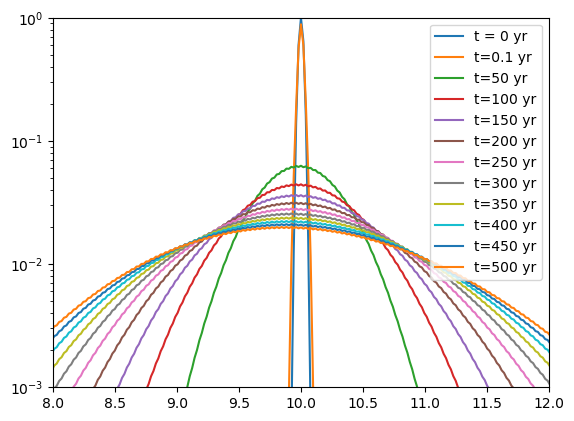

In [9]:
rhod = np.exp(- 0.5*(rcs.to_value("au") - 10)**2/(0.02**2))

t = 0*u.yr
dt = 0.1*u.yr
tfinal = 500*u.yr

t_save = 100*u.yr
N_save = int((tfinal / t_save).decompose()) + 1
times_save = np.linspace(0, tfinal, N_save)
saves = np.zeros((len(times_save), Ncells))


fig, ax = plt.subplots()

ax.plot(rcs, rhod, label = "t = 0 yr")

nplot = 0

saves[0] = rhod


for n in tqdm(range(N_save-1)):
    while t < times_save[n+1]:
        
        X = np.gradient(rcs*rhod, rcs)
        rhs = np.gradient(Dd * X, rcs)/rcs
        rhs = rhs.decompose()
        rhod += (dt*rhs).decompose().value
        
        t += dt
        
        if t > nplot*tfinal/10:
            ax.plot(rcs, rhod, label = f"t={t:.3g}")
            nplot += 1
    
    saves[n+1] = rhod

ax.legend()
ax.set_yscale("log")
ax.set_ylim(bottom=1e-3, top=1)
ax.set_xlim(8,12)

(0.0, 20.0)

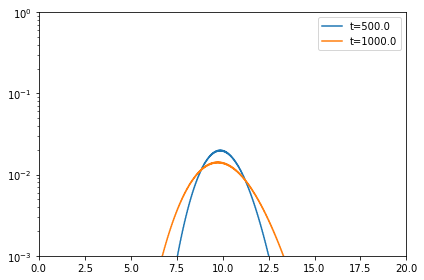

In [80]:
fig, ax = plt.subplots()

times = times_save.to_value("yr")

tplot = 500
n = np.argmin(np.abs(times - tplot))
ax.plot(rcs, saves[n], label = f"t={times[n]}")

tplot = 1000
n = np.argmin(np.abs(times - tplot))
ax.plot(rcs, saves[n], label = f"t={times[n]}")

ax.set_yscale("log")
ax.set_ylim(bottom=1e-3,top=1)
ax.legend(loc="best")
ax.set_xlim(left=0, right=20)

(0.0, 20.0)

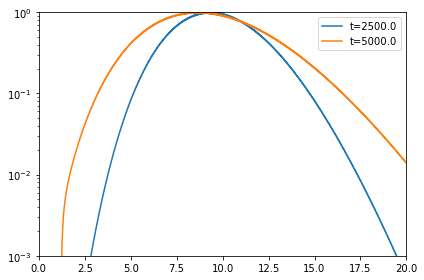

In [87]:
fig, ax = plt.subplots()

times = times_save.to_value("yr")

tplot = 2500
n = np.argmin(np.abs(times - tplot))
X = rcs
Y = saves[n]/np.max(saves[n])
ax.plot(X, Y, label = f"t={times[n]}")

tplot = 5000
n = np.argmin(np.abs(times - tplot))
X = rcs
Y = saves[n]/np.max(saves[n])
ax.plot(X, Y, label = f"t={times[n]}")

ax.set_yscale("log")
ax.set_ylim(bottom=1e-3,top=1)
ax.legend(loc="best")
ax.set_xlim(left=0, right=20)

In [82]:
np.save("analytic_profiles", saves)
np.save("analytic_times", times_save.to_value("yr"))
np.save("analytic_radii", rcs.to_value("au"))

In [83]:
ls = np.load("analytic_profiles.npy")
lt = np.load("analytic_times.npy")
lr = np.load("analytic_radii.npy")

(0.0, 20.0)

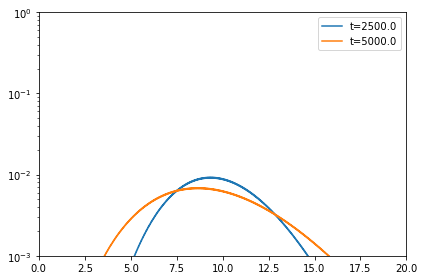

In [84]:
fig, ax = plt.subplots()

tplot = 2500
n = np.argmin(np.abs(lt - tplot))
ax.plot(rcs, ls[n], label = f"t={lt[n]}")

tplot = 5000
n = np.argmin(np.abs(lt - tplot))
ax.plot(rcs, ls[n], label = f"t={lt[n]}")

ax.set_yscale("log")
ax.set_ylim(bottom=1e-3,top=1)
ax.legend(loc="best")
ax.set_xlim(left=0, right=20)

In [86]:
lr

array([ 1.00975,  1.02925,  1.04875, ..., 39.95125, 39.97075, 39.99025])